# Nutrition, Physical Activity, and Obesity Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nutrition_df = pd.read_csv('/home/studen/Downloads/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (1).csv')

In [3]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   93249 non-null  int64  
 1   YearEnd                     93249 non-null  int64  
 2   LocationAbbr                93249 non-null  object 
 3   LocationDesc                93249 non-null  object 
 4   Datasource                  93249 non-null  object 
 5   Class                       93249 non-null  object 
 6   Topic                       93249 non-null  object 
 7   Question                    93249 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             93249 non-null  object 
 10  Data_Value                  84014 non-null  float64
 11  Data_Value_Alt              84014 non-null  float64
 12  Data_Value_Footnote_Symbol  9235 non-null   object 
 13  Data_Value_Footnote         923

Running nutrition_df.info() was crucial for understanding the dataset's structure and quality. It provides a summary of the dataset’s layout, including the number of rows, columns, and the data types for each column, which helps in determining appropriate data operations and transformations. By identifying the number of non-null entries in each column, it reveals the extent of missing values, guiding decisions on how to handle incomplete data—whether through imputation or removal. This initial review assesses the dataset’s completeness and quality, highlighting columns with significant missing data that may need special handling or could be considered for removal. Additionally, knowing the data types assists in planning feature engineering tasks, such as encoding categorical variables and processing numerical values. The memory usage information also helps in optimizing data processing, ensuring that large datasets are handled efficiently. Overall, info() provides a comprehensive overview that directs data cleaning, preprocessing, and analysis efforts.
Based on the nutrition_df.info() output, the dataset contains 93,249 rows and 33 columns. It includes 3 integer columns (likely for indexing), 6 float columns (containing numerical measurements), and 24 object columns (categorical or text data). Notably, some columns have significant missing values: Data_Value_Unit is entirely empty, while Data_Value_Footnote_Symbol, Data_Value_Footnote, and Total have considerable gaps. Several other columns like Age(years), Education, Gender, Income, and Race/Ethnicity also have substantial missing values, impacting the dataset's completeness. Despite this, many columns are fully populated, indicating good data availability for those features. The dataset uses approximately 23.5 MB of memory. Actions to consider include developing strategies for handling missing data (such as imputation or removal), planning feature engineering tasks, cleaning inconsistent data, and monitoring memory usage to optimize processing. This overview provides a solid foundation for subsequent data exploration, cleaning, and analysis efforts.

In [4]:
nutrition_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


# Data Cleaning

In [5]:
nutrition_df = nutrition_df.drop(columns=['Data_Value_Unit'])

I noticed that the Data_Value_Unit column in my dataset is completely empty. After checking the first rows, I confirmed that this column isn’t being used in any calculations or analyses. Since it doesn’t contribute any useful information, I can safely remove it to simplify my dataset

In [6]:
nutrition_df = nutrition_df.drop(columns=['StratificationID1','StratificationCategoryId1','LocationID','DataValueTypeID','QuestionID','TopicID','ClassID'])

I deleted the column with just unique ID's because Unique ID columns are typically meant for identification purposes, not for analysis or prediction. In feature engineering, the goal is to create or select features that capture meaningful patterns and relationships in the data that can be used for model training or analysis. Unique ID columns do not provide any such patterns or relationships since each value is distinct and doesn't correlate with the target variable or other features in a meaningful way.

In [7]:
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   93249 non-null  int64  
 1   YearEnd                     93249 non-null  int64  
 2   LocationAbbr                93249 non-null  object 
 3   LocationDesc                93249 non-null  object 
 4   Datasource                  93249 non-null  object 
 5   Class                       93249 non-null  object 
 6   Topic                       93249 non-null  object 
 7   Question                    93249 non-null  object 
 8   Data_Value_Type             93249 non-null  object 
 9   Data_Value                  84014 non-null  float64
 10  Data_Value_Alt              84014 non-null  float64
 11  Data_Value_Footnote_Symbol  9235 non-null   object 
 12  Data_Value_Footnote         9235 non-null   object 
 13  Low_Confidence_Limit        840

## Column Renaming

In [8]:
nutrition_df.rename(columns={
    'YearStart': 'year_start',
    'YearEnd': 'year_end',
    'LocationAbbr': 'location_abbr',
    'LocationDesc': 'location_desc',
    'Datasource': 'datasource',
    'Class': 'class',
    'Topic': 'topic',
    'Question': 'question',
    'Data_Value_Type': 'data_value_type',
    'Data_Value': 'data_value',
    'Data_Value_Alt': 'data_value_alt',
    'Data_Value_Footnote_Symbol': 'data_value_footnote_symbol',
    'Data_Value_Footnote': 'data_value_footnote',
    'Low_Confidence_Limit': 'low_confidence_limit',
    'High_Confidence_Limit': 'high_confidence_limit',
    'Sample_Size': 'sample_size',
    'Total': 'total',
    'Age(years)': 'age_years',
    'Education': 'education',
    'Gender': 'gender',
    'Income': 'income',
    'Race/Ethnicity': 'race_ethnicity',
    'GeoLocation': 'geo_location',
    'StratificationCategory1': 'stratification_category',
    'Stratification1': 'stratification',
}, inplace=True)
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year_start                  93249 non-null  int64  
 1   year_end                    93249 non-null  int64  
 2   location_abbr               93249 non-null  object 
 3   location_desc               93249 non-null  object 
 4   datasource                  93249 non-null  object 
 5   class                       93249 non-null  object 
 6   topic                       93249 non-null  object 
 7   question                    93249 non-null  object 
 8   data_value_type             93249 non-null  object 
 9   data_value                  84014 non-null  float64
 10  data_value_alt              84014 non-null  float64
 11  data_value_footnote_symbol  9235 non-null   object 
 12  data_value_footnote         9235 non-null   object 
 13  low_confidence_limit        840

## Filling Null values using GroupBy, ffill() and bfill()

Renaming columns to follow Python's naming conventions is essential for readability, consistency, and ease of use. It improves code maintainability, reduces errors, and ensures smooth integration with libraries. Using clear, descriptive, and standardized names enhances collaboration and simplifies data manipulation and analysis, making your dataset more accessible and manageable.

In [9]:
nutrition_df['data_value'] = nutrition_df.groupby(['location_abbr', 'year_start'])['data_value'].transform(lambda x: x.ffill().bfill())
nutrition_df['data_value_alt'] = nutrition_df.groupby(['location_abbr', 'year_start'])['data_value_alt'].transform(lambda x: x.ffill().bfill())

Grouping the data by location_abbr and year_start before filling missing values ensures that the imputation process maintains the consistency and accuracy of the dataset. By grouping by location, we ensure that any imputed values come from the same geographic area, preserving the regional integrity of the data. Grouping by year ensures that data values filled are relevant to the same time period, which is crucial for maintaining the temporal accuracy of the dataset. This approach leverages localized trends and patterns, making the imputation more accurate, especially in datasets that may exhibit seasonal or cyclical variations. Additionally, by grouping the data, we avoid the risk of distorting the dataset with values from different locations or years, ensuring that the filled values remain contextually relevant and accurate.

In [10]:
nutrition_df['age_years'] = nutrition_df.groupby(['age_years'])['age_years'].transform(lambda x: x.ffill().bfill())
nutrition_df['education'] = nutrition_df.groupby(['education'])['education'].transform(lambda x: x.ffill().bfill())
nutrition_df['gender'] = nutrition_df.groupby(['gender'])['gender'].transform(lambda x: x.ffill().bfill())
nutrition_df['income'] = nutrition_df.groupby(['income'])['income'].transform(lambda x: x.ffill().bfill())
nutrition_df['race_ethnicity'] = nutrition_df.groupby(['race_ethnicity'])['race_ethnicity'].transform(lambda x: x.ffill().bfill())

For each of these demographic columns, grouping by the column itself ensures that any missing values are filled with contextually relevant data from within the same group. This approach maintains the internal consistency of each demographic category, preventing distortion of the dataset and ensuring that the filled values remain accurate and meaningful within their specific demographic context.

In [11]:
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year_start                  93249 non-null  int64  
 1   year_end                    93249 non-null  int64  
 2   location_abbr               93249 non-null  object 
 3   location_desc               93249 non-null  object 
 4   datasource                  93249 non-null  object 
 5   class                       93249 non-null  object 
 6   topic                       93249 non-null  object 
 7   question                    93249 non-null  object 
 8   data_value_type             93249 non-null  object 
 9   data_value                  92764 non-null  float64
 10  data_value_alt              92764 non-null  float64
 11  data_value_footnote_symbol  9235 non-null   object 
 12  data_value_footnote         9235 non-null   object 
 13  low_confidence_limit        840

## Filling Numerical Categories using KNNImputer

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
numeric_columns = ['data_value', 'data_value_alt', 'sample_size']
nutrition_df[numeric_columns] = imputer.fit_transform(nutrition_df[numeric_columns])
print(nutrition_df[numeric_columns].isnull().sum())

data_value        0
data_value_alt    0
sample_size       0
dtype: int64


In [14]:
from sklearn.impute import KNNImputer
numeric_columns_with_missing = ['low_confidence_limit', 'High_Confidence_Limit ']
imputer = KNNImputer(n_neighbors=5)
nutrition_df[numeric_columns_with_missing] = imputer.fit_transform(nutrition_df[numeric_columns_with_missing])
print(nutrition_df[numeric_columns_with_missing].isnull().sum())

low_confidence_limit      0
High_Confidence_Limit     0
dtype: int64


I chose to use the KNNImputer because it offers a more nuanced approach to filling in missing values by considering the relationships between different features in my dataset. By finding the five closest neighbors for each missing value and averaging their non-missing values, the imputer captures complex patterns that a simple group by method couldn’t. The flexibility and precision of KNNImputer make it ideal for maintaining the integrity of my data, ensuring that the imputation is context-aware and accurate, rather than relying on a broad assumption like the mean or median. This method better reflects the true nature of the data, making my analysis more reliable.

In [15]:
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year_start                  93249 non-null  int64  
 1   year_end                    93249 non-null  int64  
 2   location_abbr               93249 non-null  object 
 3   location_desc               93249 non-null  object 
 4   datasource                  93249 non-null  object 
 5   class                       93249 non-null  object 
 6   topic                       93249 non-null  object 
 7   question                    93249 non-null  object 
 8   data_value_type             93249 non-null  object 
 9   data_value                  93249 non-null  float64
 10  data_value_alt              93249 non-null  float64
 11  data_value_footnote_symbol  9235 non-null   object 
 12  data_value_footnote         9235 non-null   object 
 13  low_confidence_limit        932

## Filling Null Values using ffill() and bfill()

In [16]:
object_columns = ['data_value_footnote_symbol', 'data_value_footnote', 'total', 'age_years',
                  'education', 'gender', 'income', 'race_ethnicity', 'geo_location', 
                  'stratification_category', 'stratification']
nutrition_df[object_columns] = nutrition_df[object_columns].ffill().bfill()
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year_start                  93249 non-null  int64  
 1   year_end                    93249 non-null  int64  
 2   location_abbr               93249 non-null  object 
 3   location_desc               93249 non-null  object 
 4   datasource                  93249 non-null  object 
 5   class                       93249 non-null  object 
 6   topic                       93249 non-null  object 
 7   question                    93249 non-null  object 
 8   data_value_type             93249 non-null  object 
 9   data_value                  93249 non-null  float64
 10  data_value_alt              93249 non-null  float64
 11  data_value_footnote_symbol  93249 non-null  object 
 12  data_value_footnote         93249 non-null  object 
 13  low_confidence_limit        932

## Conversion of Values to String

In [17]:
nutrition_df = nutrition_df.astype({col: 'string' for col in nutrition_df.select_dtypes(include='object').columns})

It's crucial to convert all object columns to strings before starting the encoding process because encoding methods (like label encoding or one-hot encoding) generally work better with strings rather than object data types. This conversion ensures that the encoding process accurately represents the categorical data, preventing potential errors and maintaining consistency across your dataset.

## Identification of Unique Values 

In [18]:
# Display unique values for each string column
for column in nutrition_df.select_dtypes(include='string'):
    print(f"Column: {column}")
    print(nutrition_df[column].unique())

Column: location_abbr
<StringArray>
['US', 'GU', 'WY', 'DC', 'PR', 'AL', 'RI', 'DE', 'NJ', 'WA', 'ME', 'MI', 'VA',
 'CA', 'UT', 'NY', 'MA', 'AR', 'IL', 'NH', 'NM', 'MD', 'MN', 'HI', 'LA', 'SD',
 'TX', 'KY', 'WV', 'CO', 'OK', 'MS', 'OR', 'WI', 'KS', 'FL', 'ID', 'AZ', 'VI',
 'MT', 'GA', 'NC', 'PA', 'ND', 'SC', 'NE', 'TN', 'MO', 'NV', 'IA', 'IN', 'OH',
 'AK', 'VT', 'CT']
Length: 55, dtype: string
Column: location_desc
<StringArray>
[            'National',                 'Guam',              'Wyoming',
 'District of Columbia',          'Puerto Rico',              'Alabama',
         'Rhode Island',             'Delaware',           'New Jersey',
           'Washington',                'Maine',             'Michigan',
             'Virginia',           'California',                 'Utah',
             'New York',        'Massachusetts',             'Arkansas',
             'Illinois',        'New Hampshire',           'New Mexico',
             'Maryland',            'Minnesota',        

Displaying unique values for each string column before encoding is crucial as it provides essential insights into the data’s content and quality, ensuring appropriate and effective encoding. This step helps in understanding the nature of the data, such as distinguishing between nominal and ordinal categories, and identifying issues like inconsistencies or high cardinality that could impact encoding efficiency. By examining unique values, you can choose the most suitable encoding method, avoid creating excessively large datasets, and ensure that all categories are correctly represented. This preliminary check is vital for accurate data preprocessing, leading to more reliable model performance and better overall results.

## One-Hot Encoding

In [19]:
import pandas as pd

# Columns to apply One-Hot Encoding
one_hot_columns = ['location_abbr', 'location_desc', 'datasource', 'class', 
                   'topic', 'question', 'gender', 'race_ethnicity', 
                   'data_value_type', 'stratification_category']

# Applying One-Hot Encoding
nutrition_df = pd.get_dummies(nutrition_df, columns=one_hot_columns)

One-Hot Encoding is crucial when dealing with categorical data in machine learning because it transforms categorical variables into a format that can be provided to ML algorithms to better predict outcomes. Specifically, each category value is converted into a new binary column, where 1 indicates the presence of that category and 0 indicates its absence. This encoding method is particularly useful for nominal categories (where there is no inherent order among the categories) because it prevents the algorithm from assuming any ordinal relationship, which could lead to incorrect conclusions. The output of One-Hot Encoding expands the dataset by adding a new column for each unique category within the original categorical columns, which allows the model to treat each category independently. This is highly beneficial as it enables the model to learn from categorical features effectively. However, a key limitation is the potential for high dimensionality when the original dataset contains many unique categories, leading to increased memory usage and computational complexity, which could slow down the training process and require more robust computational resources.

## Binary Encoding

In [20]:
import category_encoders as ce

# Columns to apply Binary Encoding
binary_columns = ['geo_location']  # Add any other high-cardinality columns as needed

# Applying Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=binary_columns)
nutrition_df = binary_encoder.fit_transform(nutrition_df)

Binary Encoding is a useful technique when dealing with categorical data, particularly when the data contains high-cardinality features—those with a large number of unique categories. Unlike One-Hot Encoding, which creates a new column for each unique category, Binary Encoding reduces the number of columns by converting each category into binary digits, which are then used to create fewer columns. This encoding is crucial because it strikes a balance between preserving the uniqueness of each category and controlling the dimensionality of the dataset. The output of Binary Encoding is a set of binary-encoded columns that represent the original high-cardinality feature in a more compact form, which reduces memory usage and improves computational efficiency. This encoding benefits machine learning by allowing the model to handle high-cardinality features without overwhelming it with too many dimensions, making it particularly useful for algorithms that struggle with high-dimensional data. However, a limitation of Binary Encoding is that while it reduces dimensionality, it introduces a new form of feature complexity that may not be as interpretable as One-Hot Encoded features, which can complicate the understanding of the model's decision-making process.

## Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# Columns to apply Label Encoding
label_columns = ['age_years', 'education', 'income']

# Applying Label Encoding
label_encoder = LabelEncoder()
for column in label_columns:
    nutrition_df[column] = label_encoder.fit_transform(nutrition_df[column])

Label Encoding is an effective method for converting categorical data into numerical values, particularly for ordinal features where there is a meaningful order or ranking among the categories. In this case, applying Label Encoding to columns like age_years, education, and income is crucial because these features represent levels or ranks that inherently possess an ordinal relationship (e.g., age ranges, education levels, and income brackets). Label Encoding assigns an integer to each category, maintaining the order without expanding the dimensionality of the dataset, which is especially important for models that can leverage the ordinal nature of the data.

The output of Label Encoding is a single column for each feature, with the categories replaced by integer values reflecting their rank or order. This encoding is beneficial in machine learning as it allows models to recognize and utilize the natural order in the data, potentially improving model performance, particularly with tree-based algorithms like Decision Trees and Random Forests, which can make use of the ordinal relationship.

However, a limitation of Label Encoding is that it can inadvertently introduce a notion of distance between categories that might not be appropriate for non-ordinal data, leading to potential biases in the model's interpretation of these values. This makes it crucial to apply Label Encoding only to features where the ordinal relationship is significant and meaningful.

## Target Encoding

In [27]:
import category_encoders as ce

pd.set_option('future.no_silent_downcasting', True)

target_variable = 'income'

target_columns = ['education','age_years']  

target_encoder = ce.TargetEncoder(cols=target_columns)
nutrition_df[target_columns] = target_encoder.fit_transform(nutrition_df[target_columns], nutrition_df[target_variable])

Target Encoding is a valuable technique for encoding categorical features based on their relationship with a target variable. It is particularly useful when the categorical data has a significant influence on the target variable and when dealing with variables that might not be well-represented by traditional encoding methods like One-Hot Encoding. Instead of creating multiple binary columns for each category, Target Encoding replaces each category with the mean of the target variable (in this case, 'income') associated with that category. This approach preserves the relationship between the categorical features and the target, thereby incorporating meaningful information into the encoded values. The output of Target Encoding is a set of numerical values representing the average target variable for each category, which can help improve model performance by integrating this relationship directly into the features. This encoding benefits machine learning by providing a more nuanced representation of categorical variables, potentially leading to better predictions. However, a limitation of Target Encoding is that it can introduce leakage if not handled properly during training and validation, as it uses information from the target variable, which might lead to overfitting if not carefully managed.

## Frequency Encoding

In [32]:
# Columns to apply Frequency Encoding
freq_columns = ['stratification']

# Applying Frequency Encoding
for column in freq_columns:
    freq_encoding = nutrition_df[column].value_counts() / len(nutrition_df)
    nutrition_df[column] = nutrition_df[column].map(freq_encoding)

Frequency Encoding is a technique used for encoding categorical variables by transforming each category into a numerical value based on its frequency in the dataset. This method is particularly useful when dealing with categorical features where the frequency of occurrence is a meaningful aspect of the data, and when traditional encoding methods like One-Hot Encoding may lead to a high-dimensional feature space. Instead of creating multiple binary columns for each category, Frequency Encoding replaces each category with the proportion of its occurrences in the dataset relative to the total number of records. This approach preserves the relative importance of each category based on its frequency, resulting in a set of numerical values that reflect how common each category is. The output of Frequency Encoding is a set of numerical values that represent the relative frequency of each category, which can help models leverage the distributional information of categorical features effectively. This encoding benefits machine learning by simplifying the data representation and potentially reducing dimensionality, which can improve model efficiency. However, a limitation of Frequency Encoding is that it may not capture the full context of the category’s significance, as it only reflects frequency without considering other relationships or interactions between features.

In [33]:
nutrition_df.head(50)

,year_start,year_end,data_value,data_value_alt,data_value_footnote_symbol,data_value_footnote,low_confidence_limit,High_Confidence_Limit,sample_size,total,...,race_ethnicity_Non-Hispanic Black,race_ethnicity_Non-Hispanic White,race_ethnicity_Other,data_value_type_Value,stratification_category_Age (years),stratification_category_Education,stratification_category_Gender,stratification_category_Income,stratification_category_Race/Ethnicity,stratification_category_Total
0,2020,2020,30.6,30.6,~,Data not available because sample size is insu...,29.400000,31.800000,31255.0,Total,...,False,False,False,True,False,False,False,False,True,False
1,2014,2014,29.3,29.3,~,Data not available because sample size is insu...,25.700000,33.300000,842.0,Total,...,False,False,False,True,False,True,False,False,False,False
2,2013,2013,28.8,28.8,~,Data not available because sample size is insu...,28.100000,29.500000,62562.0,Total,...,False,False,False,True,False,False,False,True,False,False
3,2013,2013,32.7,32.7,~,Data not available because sample size is insu...,31.900000,33.500000,60069.0,Total,...,False,False,False,True,False,False,False,True,False,False
4,2015,2015,26.6,26.6,~,Data not available because sample size is insu...,25.600000,27.600000,30904.0,Total,...,False,False,False,True,False,False,False,True,False,False
5,2015,2015,27.4,27.4,~,Data not available because sample size is insu...,18.600000,38.500000,125.0,Total,...,False,False,False,True,False,False,False,False,True,False
6,2012,2012,48.5,48.5,~,Data not available because sample size is insu...,32.300000,64.900000,69.0,Total,...,False,False,False,True,False,False,False,False,True,False
7,2012,2012,31.6,31.6,~,Data not available because sample size is insu...,24.000000,40.400000,243.0,Total,...,False,False,False,True,False,True,False,False,False,False
8,2015,2015,38.1,38.1,~,Data not available because sample size is insu...,32.600000,43.800000,421.0,Total,...,False,False,False,True,False,False,False,True,False,False
9,2011,2011,35.2,35.2,~,Data not available because sample size is insu...,30.700000,40.000000,598.0,Total,...,False,False,False,True,True,False,False,False,False,False


In [34]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93249 entries, 0 to 93248
Columns: 165 entries, year_start to stratification_category_Total
dtypes: Float64(1), boolean(144), float64(7), int64(10), string(3)
memory usage: 40.6 MB


## Checking for cardinality

In [35]:
import pandas as pd

# Assuming your DataFrame is named nutrition_df
# Check for cardinality
def check_high_cardinality(df, threshold=0.1):
    cardinality_info = {}
    total_rows = len(df)
    
    for column in df.columns:
        unique_count = df[column].nunique()
        cardinality_ratio = unique_count / total_rows
        
        cardinality_info[column] = {
            'unique_values': unique_count,
            'total_rows': total_rows,
            'cardinality_ratio': cardinality_ratio,
            'high_cardinality': cardinality_ratio > threshold
        }
        
    return cardinality_info

# Define the threshold for high cardinality (e.g., more than 10% of the rows)
high_cardinality_info = check_high_cardinality(nutrition_df, threshold=0.1)

# Print columns with high cardinality
print("Columns with High Cardinality:")
for column, info in high_cardinality_info.items():
    if info['high_cardinality']:
        print(f"{column}: {info['unique_values']} unique values ({info['cardinality_ratio']:.2%} of total rows)")

Columns with High Cardinality:
sample_size: 10229 unique values (10.97% of total rows)


The code snippet provided is crucial for identifying columns with high cardinality in a DataFrame, which is essential for effective data preprocessing and analysis. The check_high_cardinality function evaluates each column to determine how many unique values it contains relative to the total number of rows. This information is then used to assess whether a column's cardinality exceeds a specified threshold, set here as 10% of the total rows. High cardinality columns can pose challenges in data analysis and machine learning, often requiring techniques like binning or grouping to manage their complexity. By running this code, you can pinpoint which columns have a large number of unique values and may need further attention, enabling you to make informed decisions about how to preprocess these features for better model performance and interpretability.

## Analysation of the column with high cardinality

In [36]:
# Summary statistics
print(nutrition_df['sample_size'].describe())

count     93249.000000
mean       3650.110919
std       17892.359493
min          50.000000
25%         557.000000
50%        1203.000000
75%        2475.000000
max      476876.000000
Name: sample_size, dtype: float64


In [37]:
print(nutrition_df['sample_size'].unique())

[31255.   842. 62562. ...  9468.  4640.  3650.]


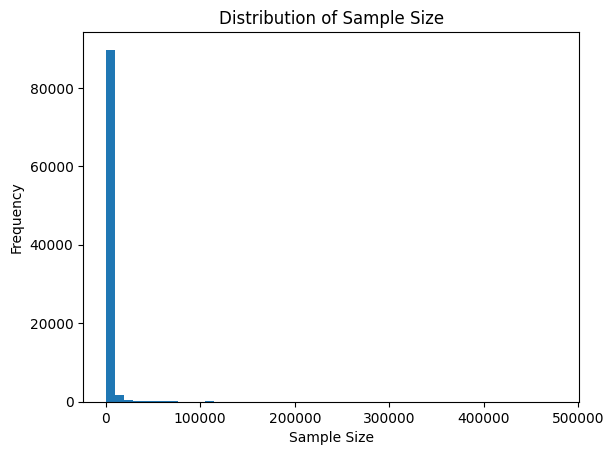

In [39]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(nutrition_df['sample_size'], bins=50)
plt.xlabel('Sample Size')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Size')
plt.show()

In [40]:
# Quantiles
print(nutrition_df['sample_size'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))

0.25      557.00
0.50     1203.00
0.75     2475.00
0.90     5022.20
0.95     7942.60
0.99    52117.36
Name: sample_size, dtype: float64


Understanding the distribution of values in a high cardinality column is essential for effective data preprocessing. By examining the column's range, frequency, and statistical summaries, you can identify patterns or outliers, which helps determine if the cardinality is genuinely high or if the column can be simplified without losing crucial information. Additionally, different binning strategies may be more or less suitable depending on the data distribution. For example, skewed data might benefit from quantile-based binning to ensure each bin contains a roughly equal number of samples, while uniformly distributed data might be better suited to equal-width bins. Proper analysis of the column helps avoid overly aggressive binning, which could lead to data loss or introduce noise, and prevents overfitting by ensuring the binning technique does not create features that are too specific to the training data. It also ensures that the chosen technique aligns with the goal of preserving or enhancing interpretability, making the transformed data relevant and understandable. Finally, analyzing the column aids in selecting a technique that balances dimensionality reduction with preserving essential information, ultimately impacting model performance and accuracy.

## Binning to reduce cardinality

In [41]:
# Define bins based on the quantiles and summary statistics
bins = [0, 557, 1203, 2475, 5022, 7942, 52117, 476876]  # Adjust based on your distribution
labels = ['< 557', '557 - 1203', '1203 - 2475', '2475 - 5022', '5022 - 7942', '7942 - 52117', '52117+']

# Apply binning
nutrition_df['sample_size_binned'] = pd.cut(nutrition_df['sample_size'], bins=bins, labels=labels, right=False)

# Display the new binned feature
print(nutrition_df[['sample_size', 'sample_size_binned']].head())

   sample_size sample_size_binned
0      31255.0       7942 - 52117
1        842.0         557 - 1203
2      62562.0             52117+
3      60069.0             52117+
4      30904.0       7942 - 52117


The technique of binning was employed on the sample_size column to manage its high cardinality and numerical variability, as indicated by the statistical analysis. By defining bins based on quantiles and summary statistics, such as 557, 1203, 2475, 5022, 7942, 52117, and 476876, and assigning labels to these ranges, the data was categorized into manageable intervals. This approach was crucial because the sample_size column contained a wide range of values, with significant outliers and variability that could impact model performance and analysis. Binning the data helps in simplifying the feature while preserving the underlying patterns, making it easier to interpret and analyze. It prevents the model from being overwhelmed by extreme values and ensures that each bin represents a meaningful range of the data, improving the dataset's interpretability. Furthermore, this technique reduces dimensionality and avoids the risk of overfitting by grouping similar data points, leading to a more robust model performance. Overall, binning enhances the clarity of the feature and ensures that the model's analysis is both efficient and meaningful.

In [42]:
import pandas as pd

# Assuming your DataFrame is named nutrition_df
columns_list = nutrition_df.columns.tolist()
print("List of all columns:")
print(columns_list)

List of all columns:
['year_start', 'year_end', 'data_value', 'data_value_alt', 'data_value_footnote_symbol', 'data_value_footnote', 'low_confidence_limit', 'High_Confidence_Limit ', 'sample_size', 'total', 'age_years', 'education', 'income', 'geo_location_0', 'geo_location_1', 'geo_location_2', 'geo_location_3', 'geo_location_4', 'geo_location_5', 'geo_location_6', 'stratification', 'location_abbr_AK', 'location_abbr_AL', 'location_abbr_AR', 'location_abbr_AZ', 'location_abbr_CA', 'location_abbr_CO', 'location_abbr_CT', 'location_abbr_DC', 'location_abbr_DE', 'location_abbr_FL', 'location_abbr_GA', 'location_abbr_GU', 'location_abbr_HI', 'location_abbr_IA', 'location_abbr_ID', 'location_abbr_IL', 'location_abbr_IN', 'location_abbr_KS', 'location_abbr_KY', 'location_abbr_LA', 'location_abbr_MA', 'location_abbr_MD', 'location_abbr_ME', 'location_abbr_MI', 'location_abbr_MN', 'location_abbr_MO', 'location_abbr_MS', 'location_abbr_MT', 'location_abbr_NC', 'location_abbr_ND', 'location_abb

## Creating New Features

In [46]:
import pandas as pd

# Assuming nutrition_df is your DataFrame

# 1. Combine Categories
# Example: Creating a broad region category from multiple state abbreviations
def categorize_region(location_abbr):
    west_coast = ['CA', 'OR', 'WA']
    east_coast = ['NY', 'NJ', 'FL']
    if location_abbr in west_coast:
        return 'West Coast'
    elif location_abbr in east_coast:
        return 'East Coast'
    else:
        return 'Other'

nutrition_df['region'] = nutrition_df.filter(like='location_abbr_').apply(lambda row: categorize_region(row.idxmax().split('_')[-1]), axis=1)

# 2. Generate Interaction Terms
nutrition_df['education_income_interaction'] = nutrition_df['education'] * nutrition_df['income']

# Print new features to verify
print(nutrition_df[['region', 'duration', 'education_income_interaction']].head(50))

        region  duration  education_income_interaction
0        Other         0                      9.020171
1        Other         0                      9.020171
2        Other         0                      9.020171
3        Other         0                     15.033618
4        Other         0                     18.040342
5        Other         0                     18.040342
6        Other         0                     18.040342
7        Other         0                     17.746930
8        Other         0                      2.957822
9        Other         0                      2.957822
10       Other         0                      3.006724
11       Other         0                      3.006724
12       Other         0                      3.006724
13       Other         0                     18.040342
14       Other         0                     18.040342
15       Other         0                     18.040342
16       Other         0                     18.040342
17       O

region: By grouping state abbreviations into broader regional categories, this feature simplifies the geographic representation and captures regional patterns that might affect the target variable. For example, regions may have different health behaviors or economic conditions that influence the dataset. Including region allows models to account for these geographical differences more effectively, potentially leading to better predictions by recognizing patterns specific to each region. It also improves interpretability by reducing the number of categorical variables, making it easier to understand regional effects.
education_income_interaction: This interaction term captures the combined effect of education and income, recognizing that these two factors often interact rather than operate independently. For example, the influence of education on income levels might vary significantly across different income brackets. By including this interaction term, models can better understand how the relationship between education and income affects the target variable, leading to more nuanced insights and potentially improving model performance by capturing complex relationships.

## Visualisation

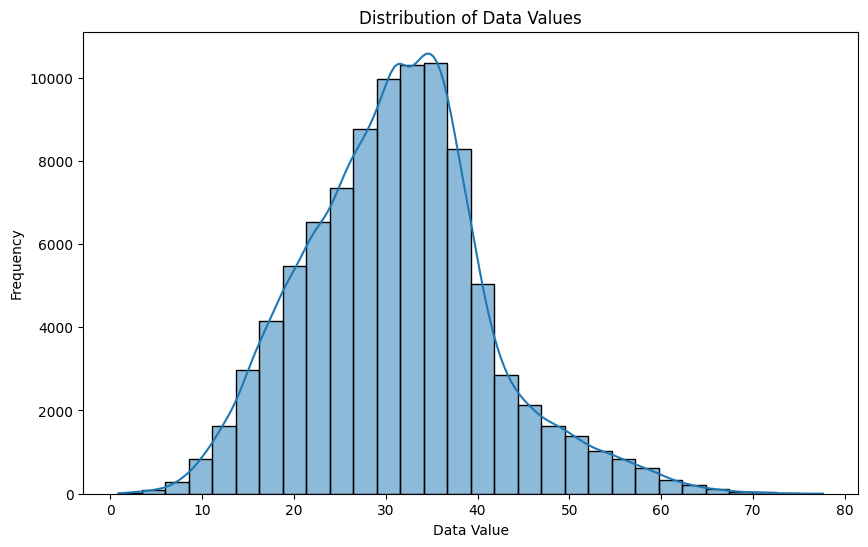

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'data_value'
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['data_value'], bins=30, kde=True)
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

Useful for visualizing the distribution of numerical columns like data_value, sample_size, or age_years. It shows how data values are spread across different ranges.

Key observations from the plot
Distribution: The data appears to follow a normal distribution (bell curve) shape, with most data points clustered around a central value (around 40 in this case) and fewer data points in the tails.
Skewness: The distribution is slightly right-skewed (tail on the right side), indicating that there are a few larger values that pull the mean to the right.
Modality: The distribution is unimodal, meaning it has a single peak.
Overall, this plot provides valuable insights into the characteristics of the data_value column, such as its central tendency, spread, and shape.

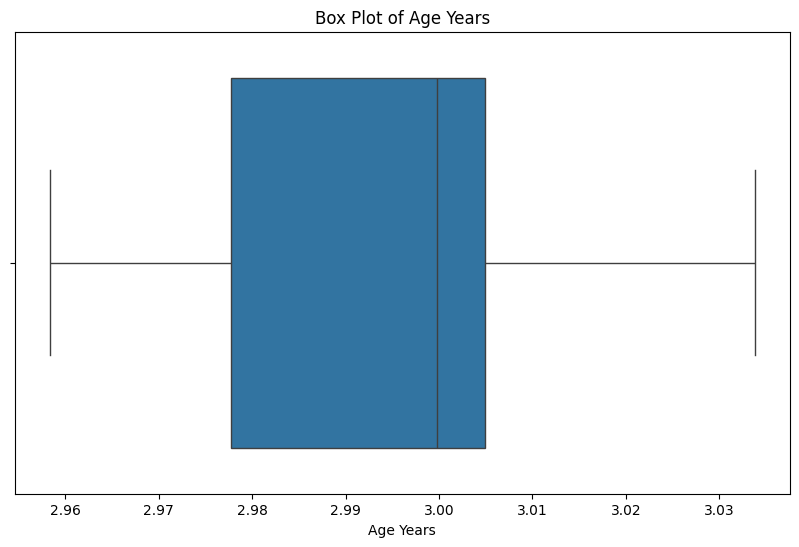

In [48]:
# Box Plot for 'age_years'
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_years', data=nutrition_df)
plt.title('Box Plot of Age Years')
plt.xlabel('Age Years')
plt.show()

Helps to understand the spread and identify outliers in numerical columns such as age_years or income.
Spread: The data is relatively tightly clustered, with a small interquartile range.

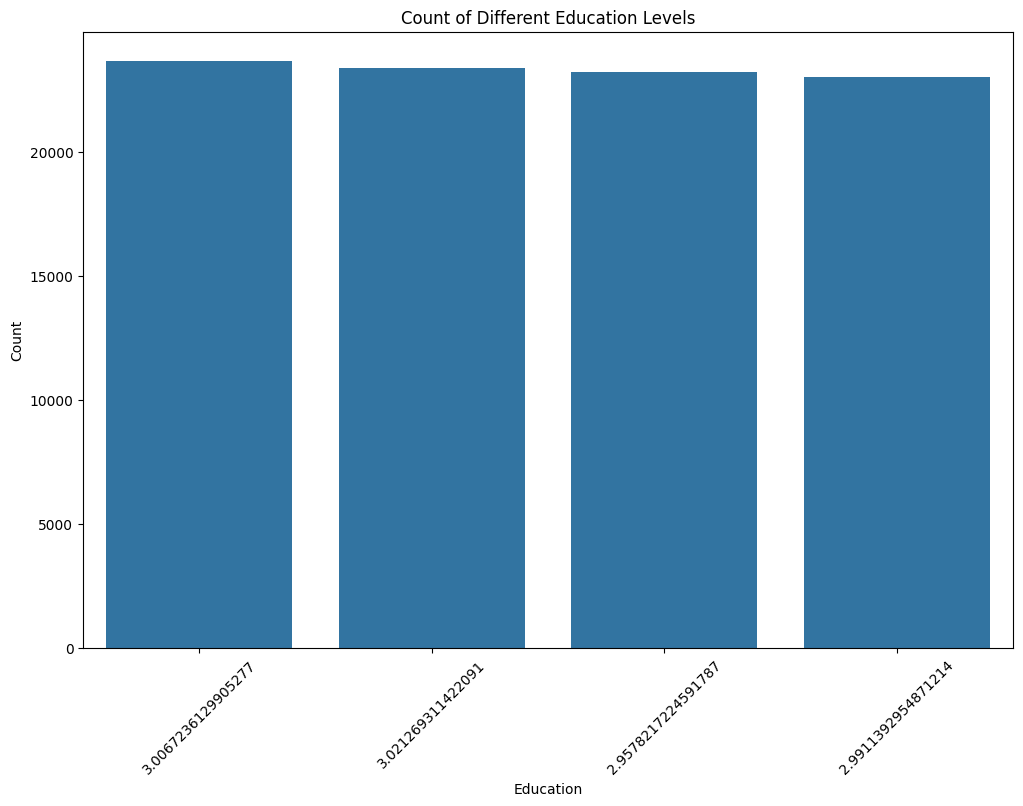

In [49]:
# Bar Chart for 'education'
plt.figure(figsize=(12, 8))
sns.countplot(x='education', data=nutrition_df, order=nutrition_df['education'].value_counts().index)
plt.title('Count of Different Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Useful for summarizing the frequency of categorical data like education, income, or any location-based features. This helps to understand the distribution of different categories.
Key observations from the plot
Most common education level: The education level with the highest count is the fourth category (represented by the label '71214'), indicating it is the most common among the data points.
Distribution: The distribution of education levels is relatively balanced, with no significant differences in counts between the categories.

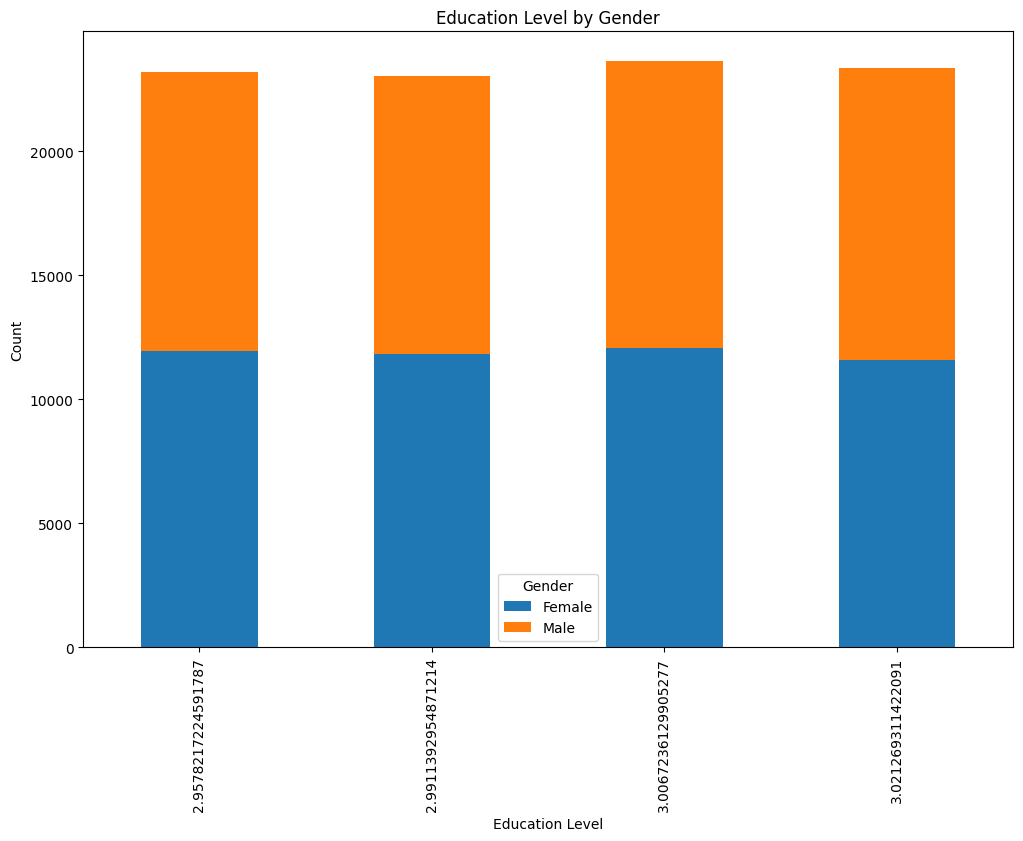

In [50]:
# Stacked Bar Chart for 'education' by 'gender'
education_gender = pd.crosstab(nutrition_df['education'], nutrition_df['gender_Male'])
education_gender.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

Useful for showing the distribution of one categorical variable within another categorical variable. For example, showing how gender distribution varies across different education levels.
Key Observations
Gender differences: The chart reveals that there are differences in the distribution of education levels between genders. For example, in the first education level, there are more females than males, while in the second education level, there are more males than females.
Overall distribution: The overall distribution of education levels is similar for both genders, with the first and third education levels being the most common.
Overall, this plot provides a visual comparison of the distribution of education levels between males and females, allowing for easy identification of gender-specific patterns and differences.

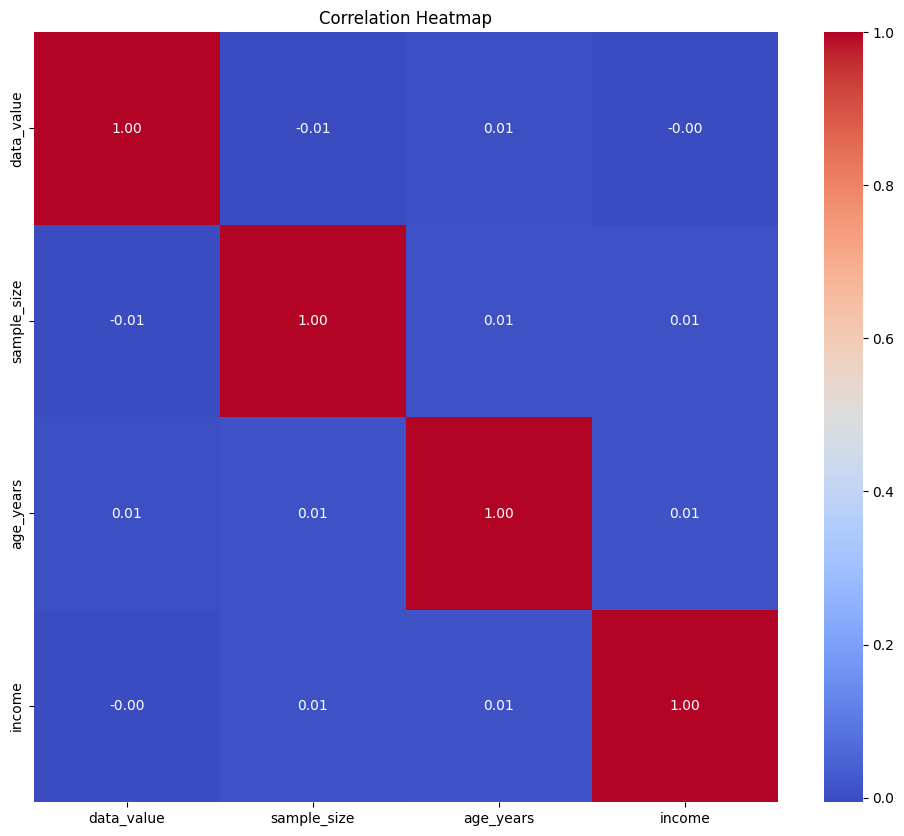

In [51]:
# Heatmap for correlations
plt.figure(figsize=(12, 10))
correlation_matrix = nutrition_df[['data_value', 'sample_size', 'age_years', 'income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Shows correlations between numerical features, helping to identify which variables are strongly correlated with each other.

Key observations from the heatmap
Strong correlations: The diagonal squares, which represent the correlation of each variable with itself, are perfectly red and have a value of 1.00, indicating perfect positive correlation.
Weak correlations: Most of the other squares have very light colors or are white, indicating weak or no correlation between the variables.
Some slight correlations: There are a few slightly red squares, such as the one between data_value and age_years, suggesting a weak positive correlation.
Overall, this heatmap provides a visual summary of the relationships between the variables in the dataset, allowing for easy identification of correlated variables and potential multicollinearity issues.

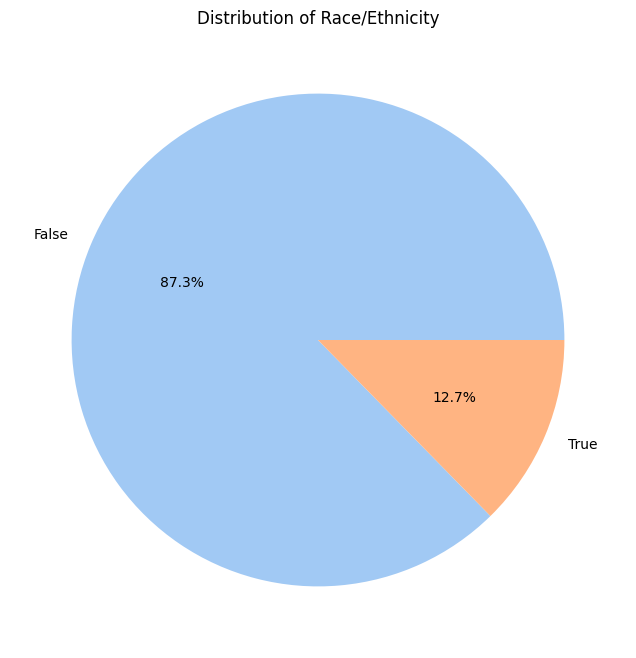

In [52]:
# Pie Chart for 'race_ethnicity'
race_ethnicity_counts = nutrition_df['race_ethnicity_American Indian/Alaska Native'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_ethnicity_counts, labels=race_ethnicity_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Race/Ethnicity')
plt.show()

Useful for visualizing the proportion of different categories within a single feature, like the distribution of gender or race_ethnicity.
Key observations 
Dominant category: The category "False" represents the majority of the data points, with 87.3% of the observations falling into this category.
Proportion of the minority category: The category "True" represents a smaller proportion of the data, with 12.7% of the observations.
Overall, this pie chart provides a visual representation of the distribution of the race_ethnicity_American Indian/Alaska Native variable in the dataset, highlighting the proportion of observations belonging to each category.

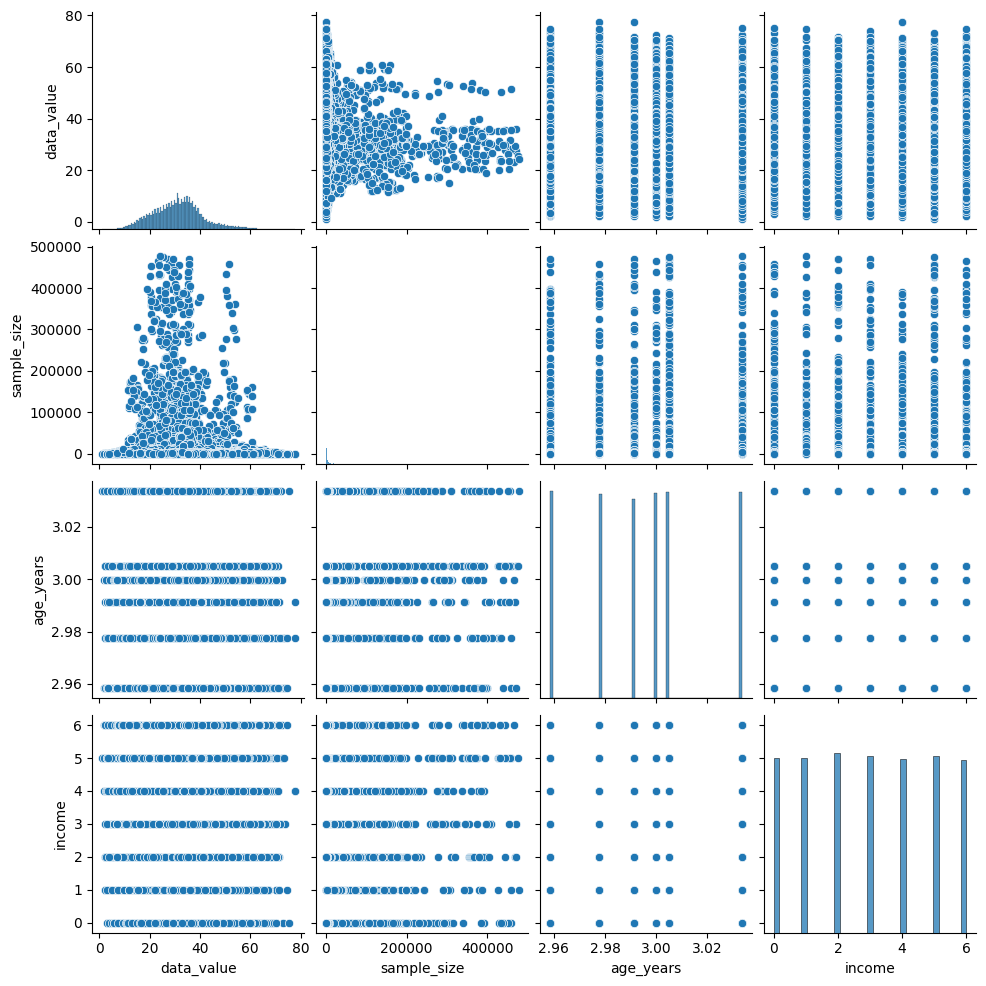

In [53]:
# Pair Plot for selected numerical features
sns.pairplot(nutrition_df[['data_value', 'sample_size', 'age_years', 'income']])
plt.show()

Shows pairwise relationships between numerical features and can help visualize interactions and correlations.
Observations
Relationship between data_value and sample_size: The scatter plot between these two variables shows a slight positive correlation, indicating that as sample_size increases, data_value tends to increase as well.
Distribution of age_years: The histogram for age_years reveals a clustering of values around 3.00, suggesting that many individuals in the dataset are around this age.
Scatter plot between age_years and income: The scatter plot between these variables shows a very weak or no correlation, suggesting that there's no clear relationship between age and income in this dataset.
Overall, the pair plot provides a valuable tool for understanding the relationships between the numerical features in the nutrition_df dataset. It helps identify potential correlations, trends, and patterns that might not be easily apparent from examining the variables individually.